<a href="https://colab.research.google.com/github/PavankumarPandya14/CODSOFT/blob/main/CREDIT-CARD-FRAUD-DETECTION/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec


In [2]:
# Step 1: Install Kaggle
!pip install kaggle

# Step 2: Move kaggle.json to the correct directory
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Step 3: Download the dataset
!kaggle datasets download -d mlg-ulb/creditcardfraud

# Step 4: Unzip the dataset
!unzip creditcardfraud.zip

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
 80% 53.0M/66.0M [00:00<00:00, 278MB/s]
100% 66.0M/66.0M [00:00<00:00, 291MB/s]
Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [4]:
df = pd.read_csv('/content/creditcard.csv')

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
df.duplicated().sum()

1081

In [9]:
# A look at the predictor variable
df["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [10]:
# A look at the shape of the data

df.shape

(284807, 31)

In [11]:
# Removing duplicate values
df.drop_duplicates(subset = None, keep = "first", inplace = True, ignore_index = True)

In [12]:
# Again having a look at the shape of the data to check the number of removed rows

df.shape

(283726, 31)

In [13]:
# Determine number of fraud cases in dataset
fraud = df[df['Class'] == 1]
valid = df[df['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(df[df['Class'] == 1])))
print('Valid Transactions: {}'.format(len(df[df['Class'] == 0])))

0.0016698852262818046
Fraud Cases: 473
Valid Transactions: 283253


In [14]:
print('Amount details of the fraudulent transaction')
fraud.Amount.describe()

Amount details of the fraudulent transaction


count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [15]:
print("Details of valid transaction")
valid.Amount.describe()

Details of valid transaction


count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

As we can clearly notice from this, the average Money transaction for the fraudulent ones is more. This makes this problem crucial to deal with.

** Plotting the Correlation Matrix**
The correlation matrix graphically gives us an idea of how features correlate with each other and can help us predict what are the features that are most relevant for the prediction.

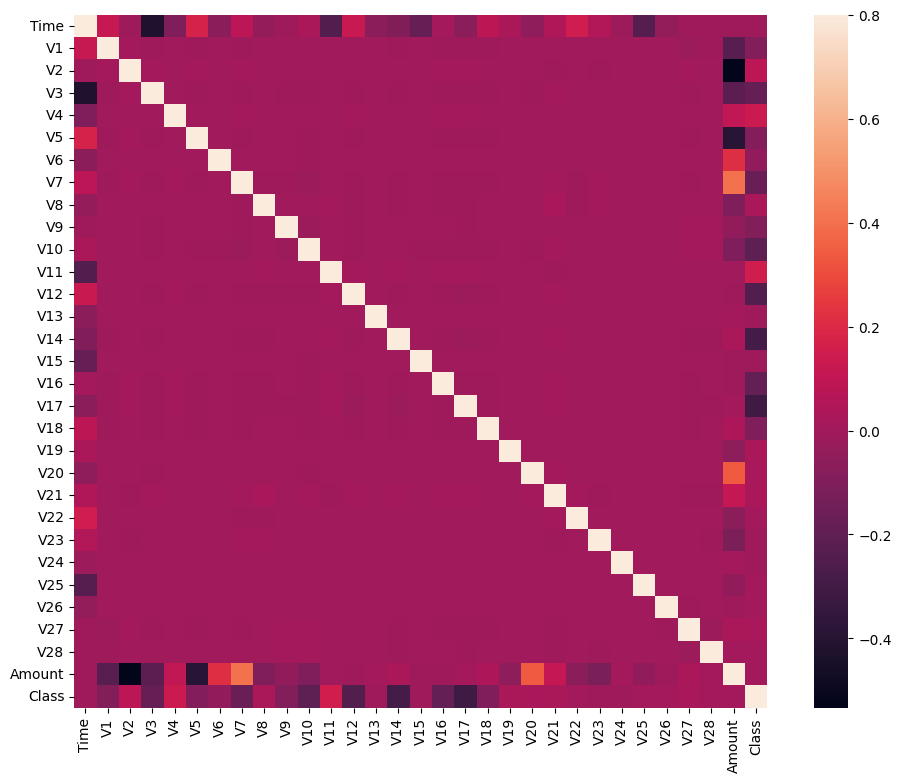

In [16]:
# Correlation matrix
corrmat = df.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()


Dividing the data into inputs parameters and outputs value format

In [17]:
# dividing the X and the Y from the dataset
X = df.drop(['Class'], axis = 1)
Y = df["Class"]
print(X.shape)
print(Y.shape)
# getting just the values for the sake of processing
# (its a numpy array with no columns)
xData = X.values
yData = Y.values

(283726, 30)
(283726,)


Training and Testing Data Bifurcation

In [18]:
# Using Scikit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(
		xData, yData, test_size = 0.2, random_state = 42)


 Building a Random Forest Model using scikit learn

In [19]:
from sklearn.impute import SimpleImputer

# Create an imputer object with a strategy of filling missing values with mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both the training and test data
xTrain_imputed = imputer.fit_transform(xTrain)
xTest_imputed = imputer.transform(xTest)



In [20]:
# Building the Random Forest Classifier (RANDOM FOREST)
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
# use the imputed data for training and prediction
rfc.fit(xTrain_imputed, yTrain)
yPred = rfc.predict(xTest_imputed)


In [21]:
imputer = SimpleImputer(strategy='most_frequent')

# Reshape yTrain and yTest to be 2D arrays with one column
yTrain_reshaped = yTrain.reshape(-1, 1)
yTest_reshaped = yTest.reshape(-1, 1)

# Fit the imputer on the training labels and transform both the training and test labels
yTrain_imputed = imputer.fit_transform(yTrain_reshaped)
yTest_imputed = imputer.transform(yTest_reshaped)

Building all kinds of evaluating parameters

In [22]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

n_outliers = len(fraud)
n_errors = (yPred != yTest).sum()
print("The model used is Random Forest classifier")

acc = accuracy_score(yTest_imputed, yPred)
print("The accuracy is {}".format(acc))

prec = precision_score(yTest_imputed, yPred)
print("The precision is {}".format(prec))

rec = recall_score(yTest_imputed, yPred)
print("The recall is {}".format(rec))

f1 = f1_score(yTest_imputed, yPred)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(yTest_imputed, yPred)
print("The Matthews correlation coefficient is{}".format(MCC))


The model used is Random Forest classifier
The accuracy is 0.9995241955380115
The precision is 0.9846153846153847
The recall is 0.7111111111111111
The F1-Score is 0.8258064516129032
The Matthews correlation coefficient is0.8365568584549206


Visualizing the confusion matrix

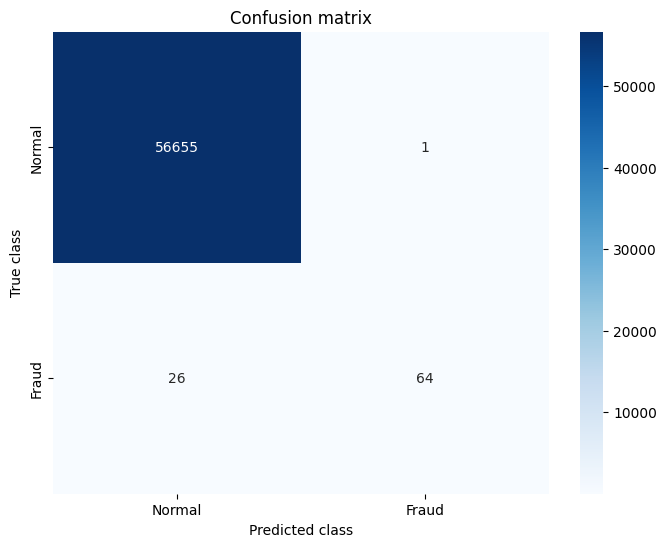

In [23]:
# printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest_imputed, yPred)
plt.figure(figsize =(8, 6))
sns.heatmap(conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d", cmap='Blues');
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()